In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Load the given csv file, for this large file, use encoding 'ISO-8859-1' for easy reading and writing 
data = pd.read_csv('spotify-2023.csv', encoding = 'ISO-8859-1')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### DataFrame Shape

In [4]:
data.shape

(953, 24)

###  DataFrame DataType

In [6]:
#Check the datatype in each columns
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

### DataFrame Missing Values

In [8]:
#Track which column of the DataFrame has missing values
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Stream Variable Mean, Median, and Standard Deviation

In [10]:
#Convert the the column into numerical data
data['streams'] = pd.to_numeric(data['streams'], errors = 'coerce')

print('Streams')

print()

#Compute for the mean
print('Mean')
mean = data['streams'].mean()
print (mean)

print()

#Compute for the median
print('Median')
median = data['streams'].median()
print (median)

print()

#Compute for the standard deviation
print('Standard Deviation')
std = data['streams'].std()
print(std)

Streams

Mean
514137424.93907565

Median
290530915.0

Standard Deviation
566856949.0388832


#### Released Year and Artist Count Distribution

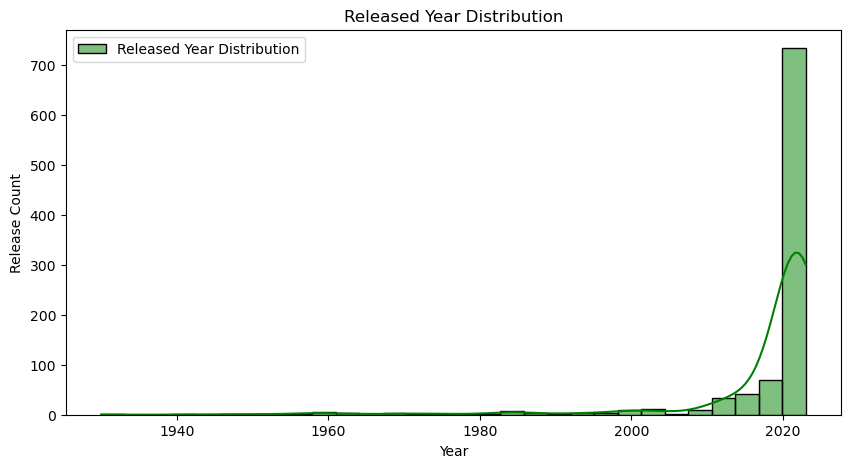

In [12]:
#Plot and manipulate a histogram for the visualization of the released year distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['released_year'], bins=30, kde=True, color='green', label='Released Year Distribution')

plt.title('Released Year Distribution')
plt.xlabel('Year')
plt.ylabel('Release Count')
plt.legend()

plt.show()

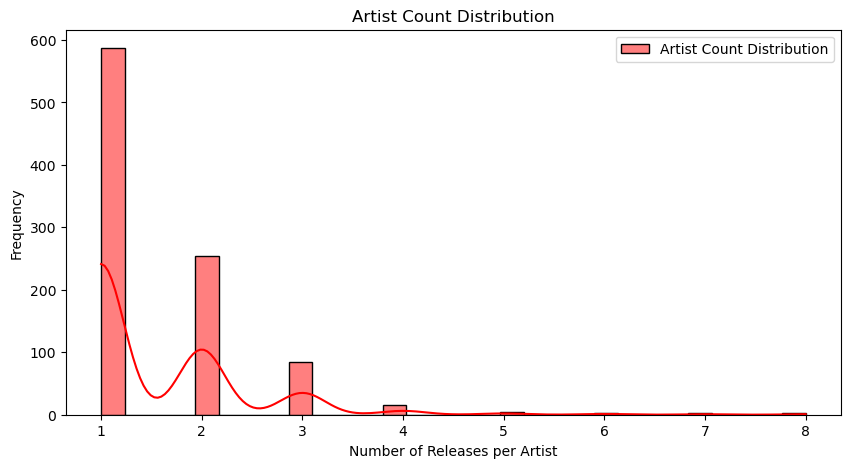

In [13]:
#Plot and manipulate a histogram for the visualization of the distribution of artist count
plt.figure(figsize=(10, 5))
sns.histplot(data['artist_count'], bins=30, kde=True, color='red', label='Artist Count Distribution')

plt.title('Artist Count Distribution')
plt.xlabel('Number of Releases per Artist')
plt.ylabel('Frequency')
plt.legend()

plt.show()

#### Top 5 Most Streamed Tracks and Artist

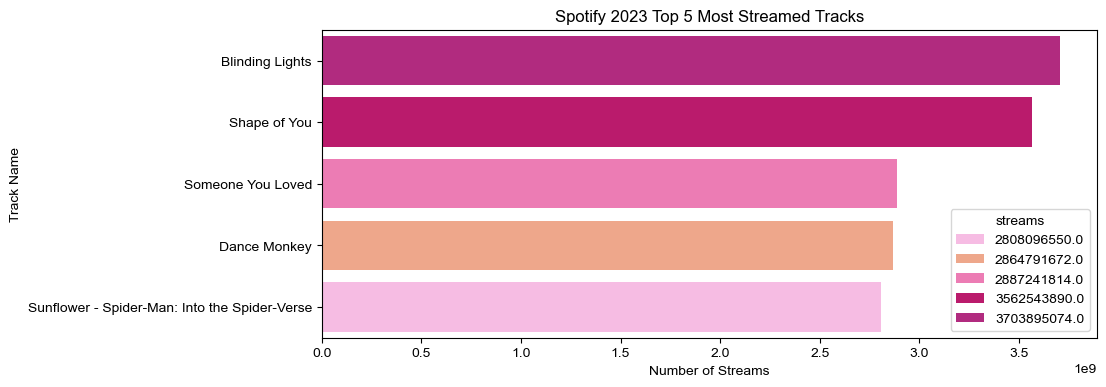

In [15]:
#Convert the non-numeric data into numeric values in order to visualize the data
data['streams'] = pd.to_numeric(data['streams'], errors = 'coerce')

#Declare a variable for the 5 largest stream values
topfive = data.nlargest(5,'streams')

#Plot and manipulate the bar graph for the visual representation of the top 5 most streamed tracks
colors = ['#FFB3E6','#FFA07A','#FF69B4','#D5006D','#C71585']
plt.figure(figsize=(10, 4))
sns.barplot(x='streams', y='track_name', data=topfive, hue='streams', palette=colors)
sns.set(style="whitegrid")

plt.title('Spotify 2023 Top 5 Most Streamed Tracks')
plt.xlabel('Number of Streams')
plt.ylabel('Track Name')

plt.show()

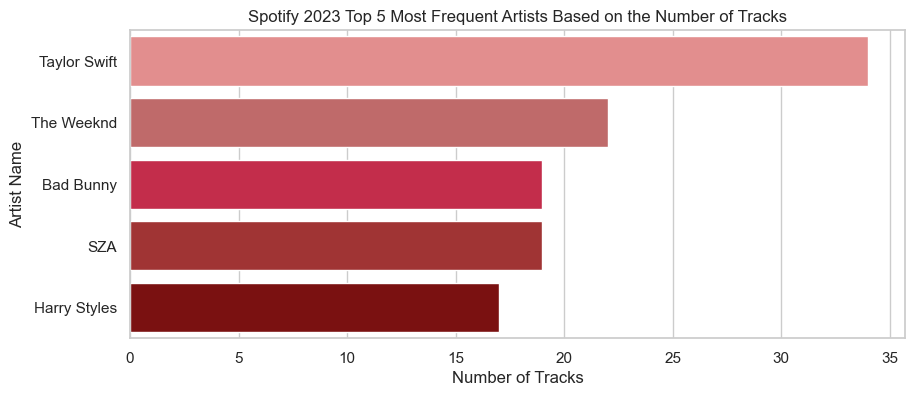

In [16]:
#Convert the non-numeric data into numeric values in order to visualize the data
data['streams'] = pd.to_numeric(data['streams'], errors = 'coerce')
count = data['artist(s)_name'].value_counts().nlargest(5).reset_index()
count.columns = ['artist(s)_name','track_count']

#Plot and manipulate the bar graph for the visual representation of the top 5 most frequent artist
colors = ['#F08080','#CD5C5C','#DC143C','#B22222','#8B0000']
plt.figure(figsize=(10, 4))
sns.barplot(x='track_count', y='artist(s)_name', data=count, hue='artist(s)_name', palette=colors)
sns.set(style="whitegrid")

plt.title('Spotify 2023 Top 5 Most Frequent Artists Based on the Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')

plt.show()

#### Tracks Released Over Time

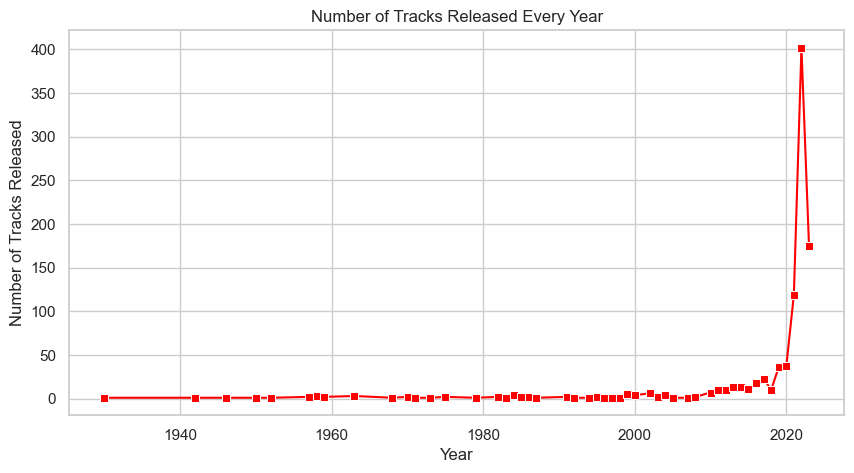

In [18]:
#Use and manipulate a lineplot for tracking the period of time in which track releases are increasing
tracks_every_year = data['released_year'].value_counts().sort_values()
plt.figure(figsize=(10,5))
sns.lineplot(x=tracks_every_year.index, y=tracks_every_year.values, marker='s', color='red')

plt.title('Number of Tracks Released Every Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks Released')

plt.show()

#### Tracks released per month

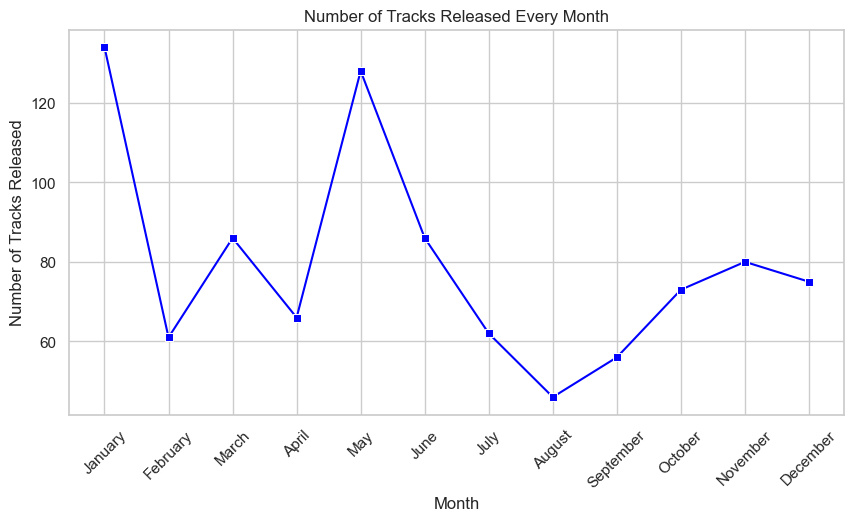

In [20]:
#Convert the the column into numerical data
data['released_month'] = pd.to_numeric(data['released_month'], errors = 'coerce')

#Assign and sort the variable and count the number of tracks each month
monthly = data.groupby('released_month').size().reset_index(name='track_count')
monthly = monthly.sort_values(by='released_month')

plt.figure(figsize=(10,5))
sns.lineplot(x='released_month', y='track_count', data=monthly, marker='s', color='blue')

plt.title('Number of Tracks Released Every Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(ticks=range(1,13), labels=['January','February','March','April','May','June','July','August','September','October','November','December'], rotation=45)

plt.show()

#### Correlations between different variables 

In [22]:
#Define a function for converting the variables into numeric data and removing non-numeric characters except for dots and commas.
def clean(column):
    #Make sure the column is treated as string type
    column = column.astype(str) 
    column = column.replace(r'[^\d.,]', '', regex=True)
    column = column.str.replace(',', '.')
    return pd.to_numeric(column, errors='coerce')

#Use the declared function in each of the column
data['danceability_%'] = clean(data['danceability_%'])
data['energy_%'] = clean(data['energy_%'])

# Summarize the values into its correlation with one another
correlation = data[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()
correlation

,streams,bpm,danceability_%,energy_%
streams,1.000000,-0.002438,-0.105457,-0.026051
bpm,-0.002438,1.000000,-0.147095,0.025794
danceability_%,-0.105457,-0.147095,1.000000,0.198095
energy_%,-0.026051,0.025794,0.198095,1.000000


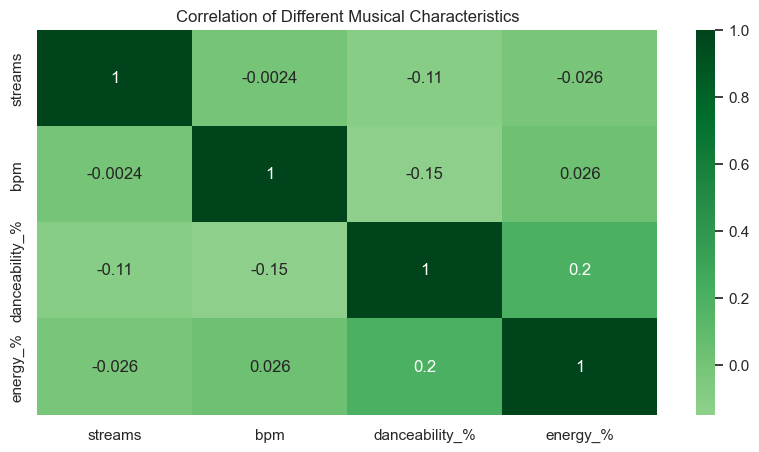

In [23]:
#Use of heatmap for the visualization of the correlation of different musical charaacteristics
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap='Greens', center=0)

plt.title('Correlation of Different Musical Characteristics')

plt.show()

#### Correlation between danceability_% and energy_%? and between valence_% and acousticness_%

In [25]:
#Define a function for converting the variables into numeric data and removing non-numeric characters except for dots and commas.
def clean(column):
    #Make sure the column is treated as string type
    column = column.astype(str) 
    column = column.replace(r'[^\d.,]', '', regex=True)
    column = column.str.replace(',', '.')
    return pd.to_numeric(column, errors='coerce')

#Use the declared function in each of the column
data['danceability_%'] = clean(data['danceability_%'])
data['energy_%'] = clean(data['energy_%'])
data['acousticness_%'] = clean(data['acousticness_%'])
data['valence_%'] = clean(data['valence_%'])

# Summarize the values into its correlation with one another
correlation = data[['streams', 'danceability_%', 'energy_%', 'acousticness_%','valence_%']].corr()
correlation

,streams,danceability_%,energy_%,acousticness_%,valence_%
streams,1.000000,-0.105457,-0.026051,-0.004485,-0.040831
danceability_%,-0.105457,1.000000,0.198095,-0.236165,0.408451
energy_%,-0.026051,0.198095,1.000000,-0.577344,0.357612
acousticness_%,-0.004485,-0.236165,-0.577344,1.000000,-0.081907
valence_%,-0.040831,0.408451,0.357612,-0.081907,1.000000


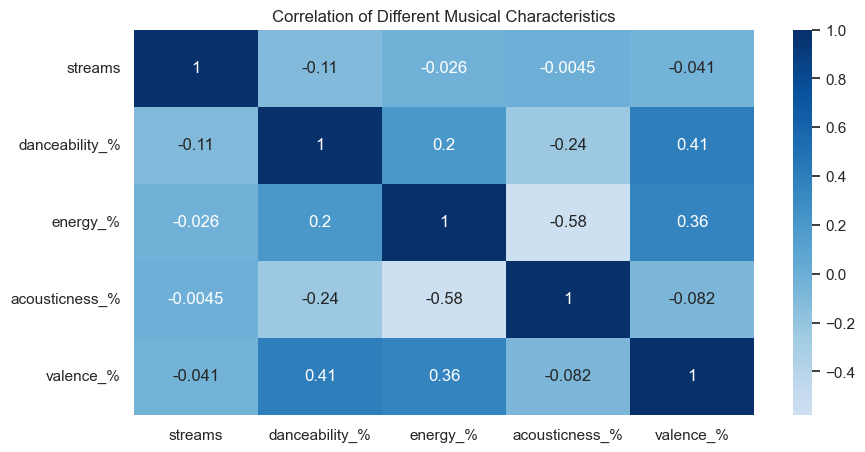

In [26]:
#Use of heatmap for the visualization of the correlation of different musical charaacteristics
plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True, cmap='Blues', center=0)

plt.title('Correlation of Different Musical Characteristics')

plt.show()

#### Spotify Playlists vs. Deezer Playlists vs. Apple Playlists

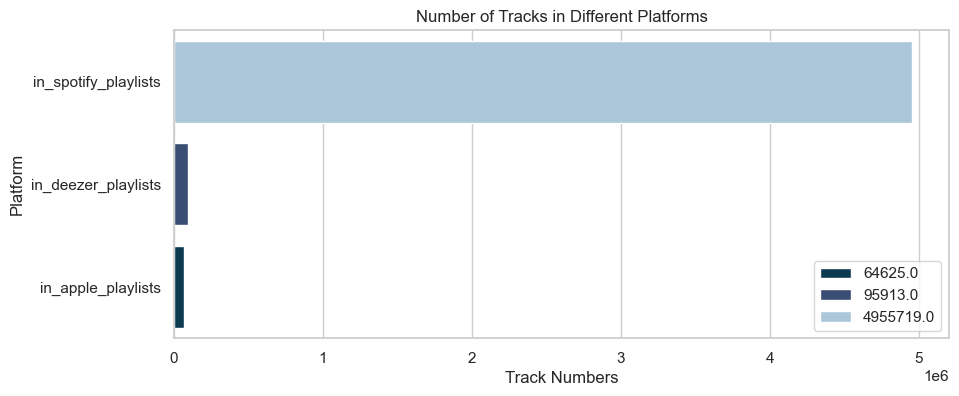

In [57]:
#Convert the non-numeric data into numeric values in order to visualize the data
data['in_spotify_playlists'] = pd.to_numeric(data['in_spotify_playlists'], errors = 'coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors = 'coerce')
data['in_apple_playlists'] = pd.to_numeric(data['in_apple_playlists'], errors = 'coerce')

#Calculate for the total tracks in each platform
platformtracks = data[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].sum()

#Plot and manipulate the bar graph for the visual representation of the data
colors = ['#003F5C','#2F4B7C','#A5C8E1']
plt.figure(figsize=(10, 4))
sns.barplot(x=platformtracks.values, y=platformtracks.index, hue=platformtracks, palette=colors)
sns.set(style="whitegrid")

plt.title('Number of Tracks in Different Platforms')
plt.xlabel('Track Numbers')
plt.ylabel('Platform')
plt.legend()

plt.show()

#### Platform that favors the most popular tracks

In [63]:
#Use the top 5 most popular track findings as a basis for the top 
platformtoptracks = data.loc[[55, 179, 86, 620, 41],['track_name','artist(s)_name','in_spotify_playlists','in_deezer_playlists','in_apple_playlists']]
platformtoptracks

,track_name,artist(s)_name,in_spotify_playlists,in_deezer_playlists,in_apple_playlists
55,Blinding Lights,The Weeknd,43899,"3,421",672
179,Shape of You,Ed Sheeran,32181,"6,808",33
86,Someone You Loved,Lewis Capaldi,17836,"1,800",440
620,Dance Monkey,Tones and I,24529,"3,595",533
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",24094,843,372


####  Patterns among tracks with the same key or mode

In [31]:
#Convert the non-numeric data into numeric values 
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
#Select the columns from the dataframe that is needed and store it in a variable
streamdata = data[['track_name','streams','key','mode']]

#Group the key and mode columns and get the sum of streams of the group
total_data = data.groupby(by=['key','mode'])['streams'].sum().reset_index()
#Rename the streams 
total_data.rename(columns={'streams':'total_streams'}, inplace=True)
#Make the total streams column float so that there is a neat representation of the values 
total_data['total_streams']=total_data['total_streams'].astype(float)
total_data

,key,mode,total_streams
0,A,Major,1.648037e+10
1,A,Minor,1.377389e+10
2,A#,Major,1.694341e+10
3,A#,Minor,1.454769e+10
4,B,Major,1.527168e+10
5,B,Minor,2.679551e+10
6,C#,Major,4.588695e+10
7,C#,Minor,2.662668e+10
8,D,Major,3.775319e+10
9,D,Minor,5.138383e+09


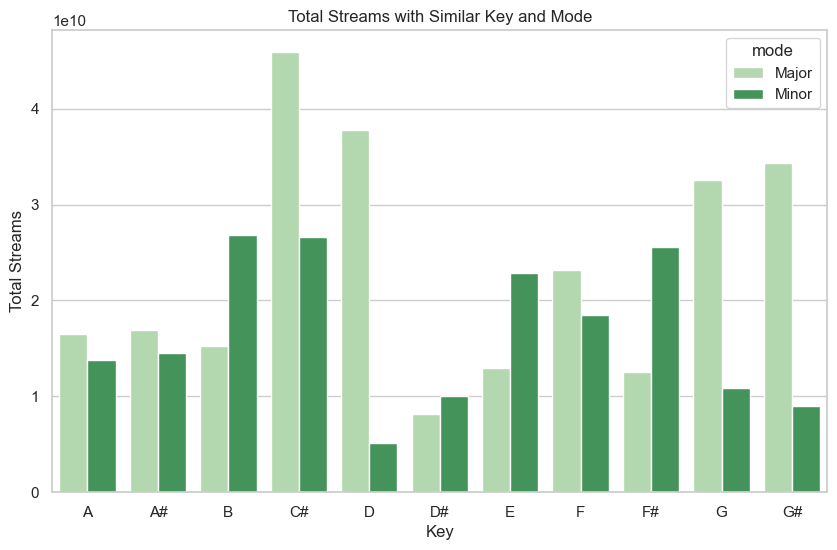

In [32]:
#Use a bargraph in visualizing the said data
plt.figure(figsize=(10, 6))
sns.barplot(x='key', y='total_streams', data=total_data, hue='mode', palette='Greens')
sns.set(style="whitegrid")

plt.title('Total Streams with Similar Key and Mode')
plt.xlabel('Key')
plt.ylabel('Total Streams')

plt.show()

#### Most frequently appearing artists in playlists or charts across different platforms

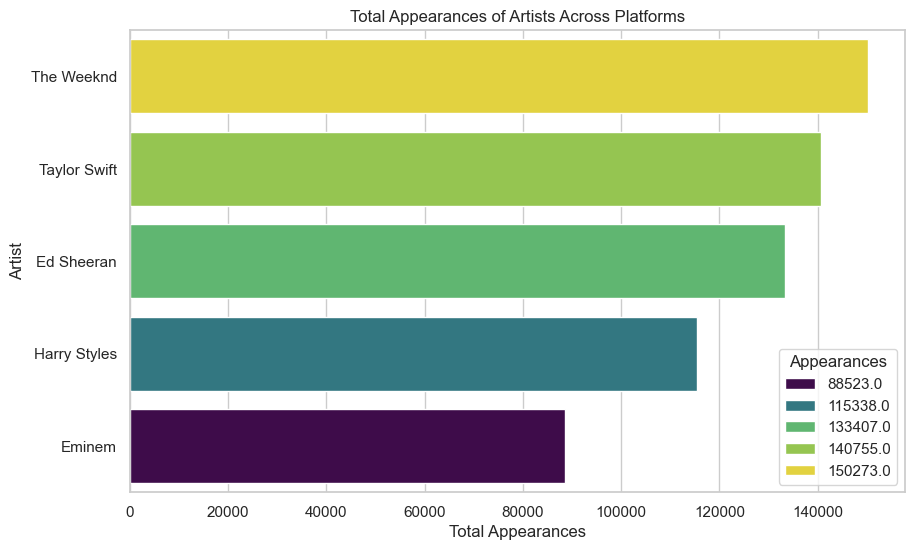

In [49]:
#Convert the non-numeric data into numeric values 
data['in_spotify_playlists'] = pd.to_numeric(data['in_spotify_playlists'], errors='coerce')
data['in_spotify_charts'] = pd.to_numeric(data['in_spotify_charts'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data['in_deezer_charts'] = pd.to_numeric(data['in_deezer_charts'], errors='coerce')
data['in_apple_playlists'] = pd.to_numeric(data['in_apple_playlists'], errors='coerce')
data['in_apple_charts'] = pd.to_numeric(data['in_apple_charts'], errors='coerce')
data['in_shazam_charts'] = pd.to_numeric(data['in_shazam_charts'], errors='coerce')

#Create a dataset of all the needed columns
playlist_charts = data[['artist(s)_name','in_spotify_playlists','in_spotify_charts','in_deezer_playlists','in_deezer_charts','in_apple_playlists','in_apple_charts','in_shazam_charts']]
#Group the artist and get the sum of streams
freq_appear = playlist_charts.groupby('artist(s)_name').sum().reset_index()
#Solve for the total appearances of each artist
freq_appear['Appearances'] = freq_appear.iloc[:,1:].sum(axis=1)
#Sort the total appearances values in descending order
sorted_freq_appear = freq_appear.sort_values(by='Appearances', ascending=False)

#Use and manipulate a bargraph in visualizing the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Appearances', y='artist(s)_name', data=sorted_freq_appear.head(5), hue='Appearances', palette='viridis')
sns.set(style="whitegrid")

plt.title('Total Appearances of Artists Across Platforms')
plt.xlabel('Total Appearances')
plt.ylabel('Artist')

plt.show()